### Import dependencies

In [1]:
from IPython.display import display_html, display
from PIL import Image as PILImage
from io import BytesIO

from img2table.document.pdf import PDF
from img2table.ocr import TesseractOCR

In [2]:
pdf_path = "data/tables.pdf"

### Instantiate objects

In [3]:
# Definition of OCR instance, requires prior installation of Tesseract-OCR
ocr = TesseractOCR()

# Definition of PDF from path
# The optional pages argument enables the extraction of table on specific pages of the PDF
pdf_from_path = PDF(src=pdf_path, ocr=ocr, pages=[0, 1])

# Definition of PDF from bytes
with open(pdf_path, 'rb') as f:
    pdf_bytes = f.read()
pdf_from_bytes = PDF(src=pdf_bytes, ocr=ocr)

# Definition of PDF from file-like object
pdf_from_file_like = PDF(src=BytesIO(pdf_bytes), ocr=ocr)

### PDF used for the example

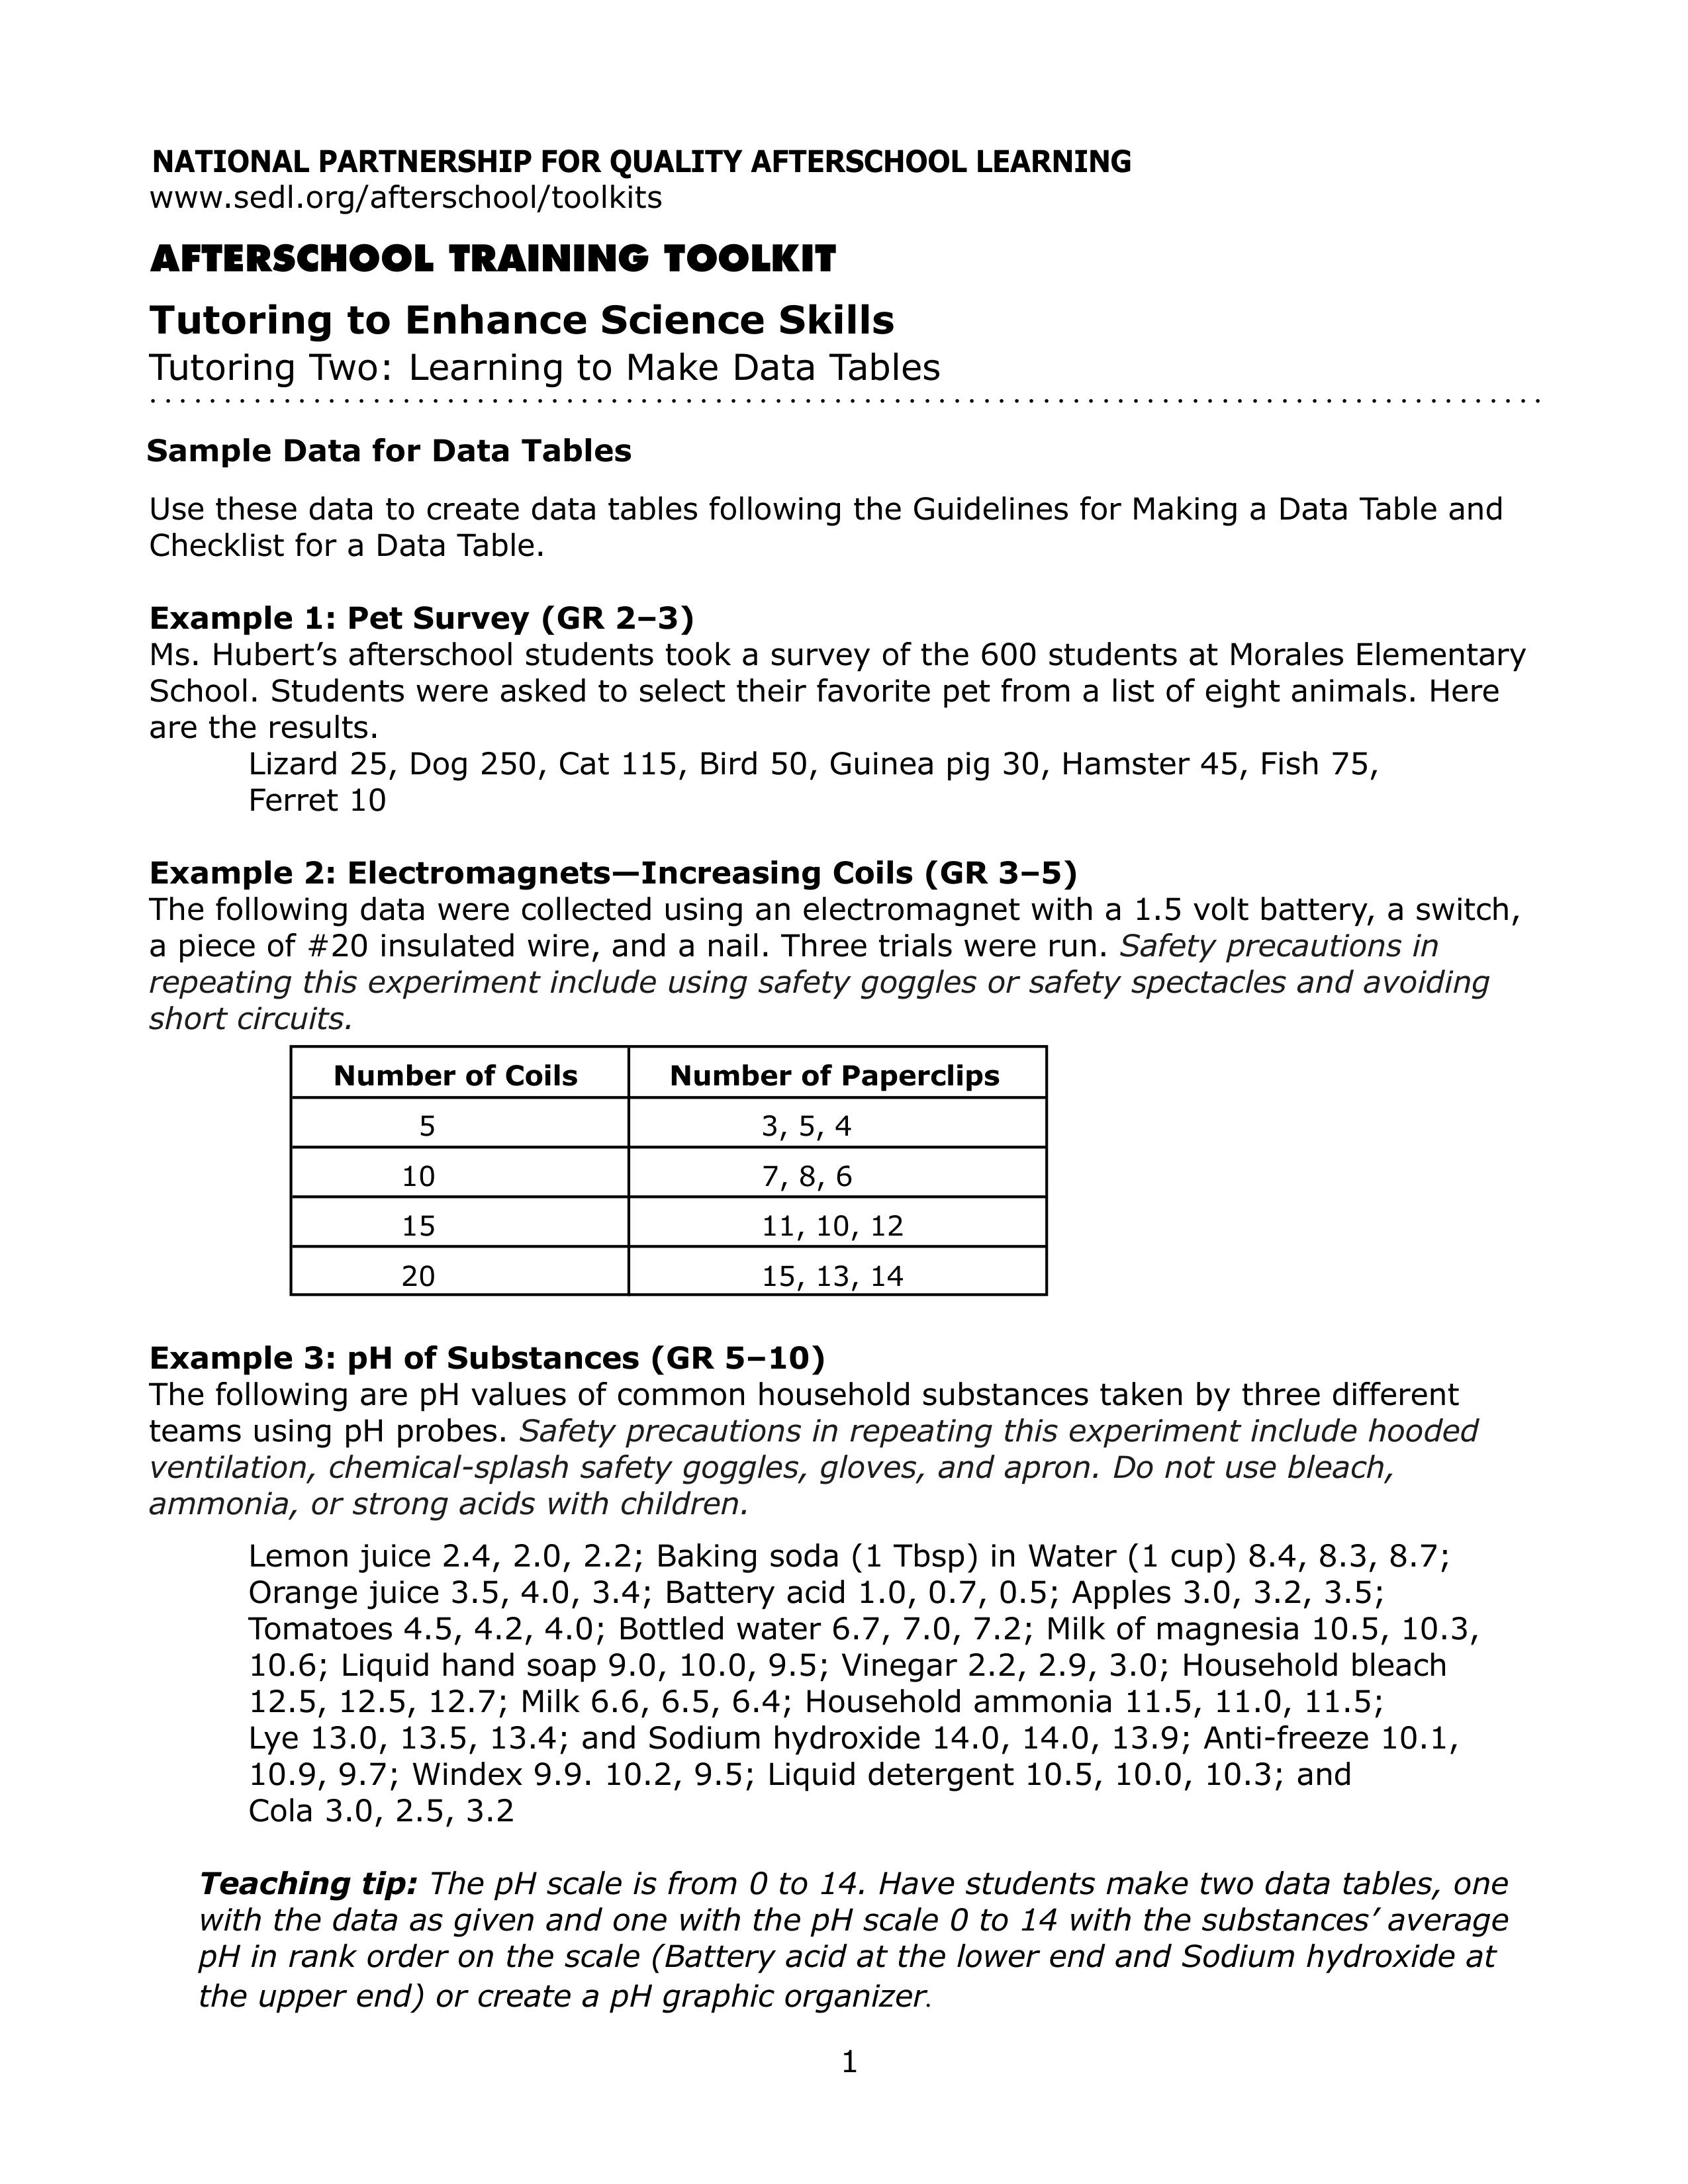

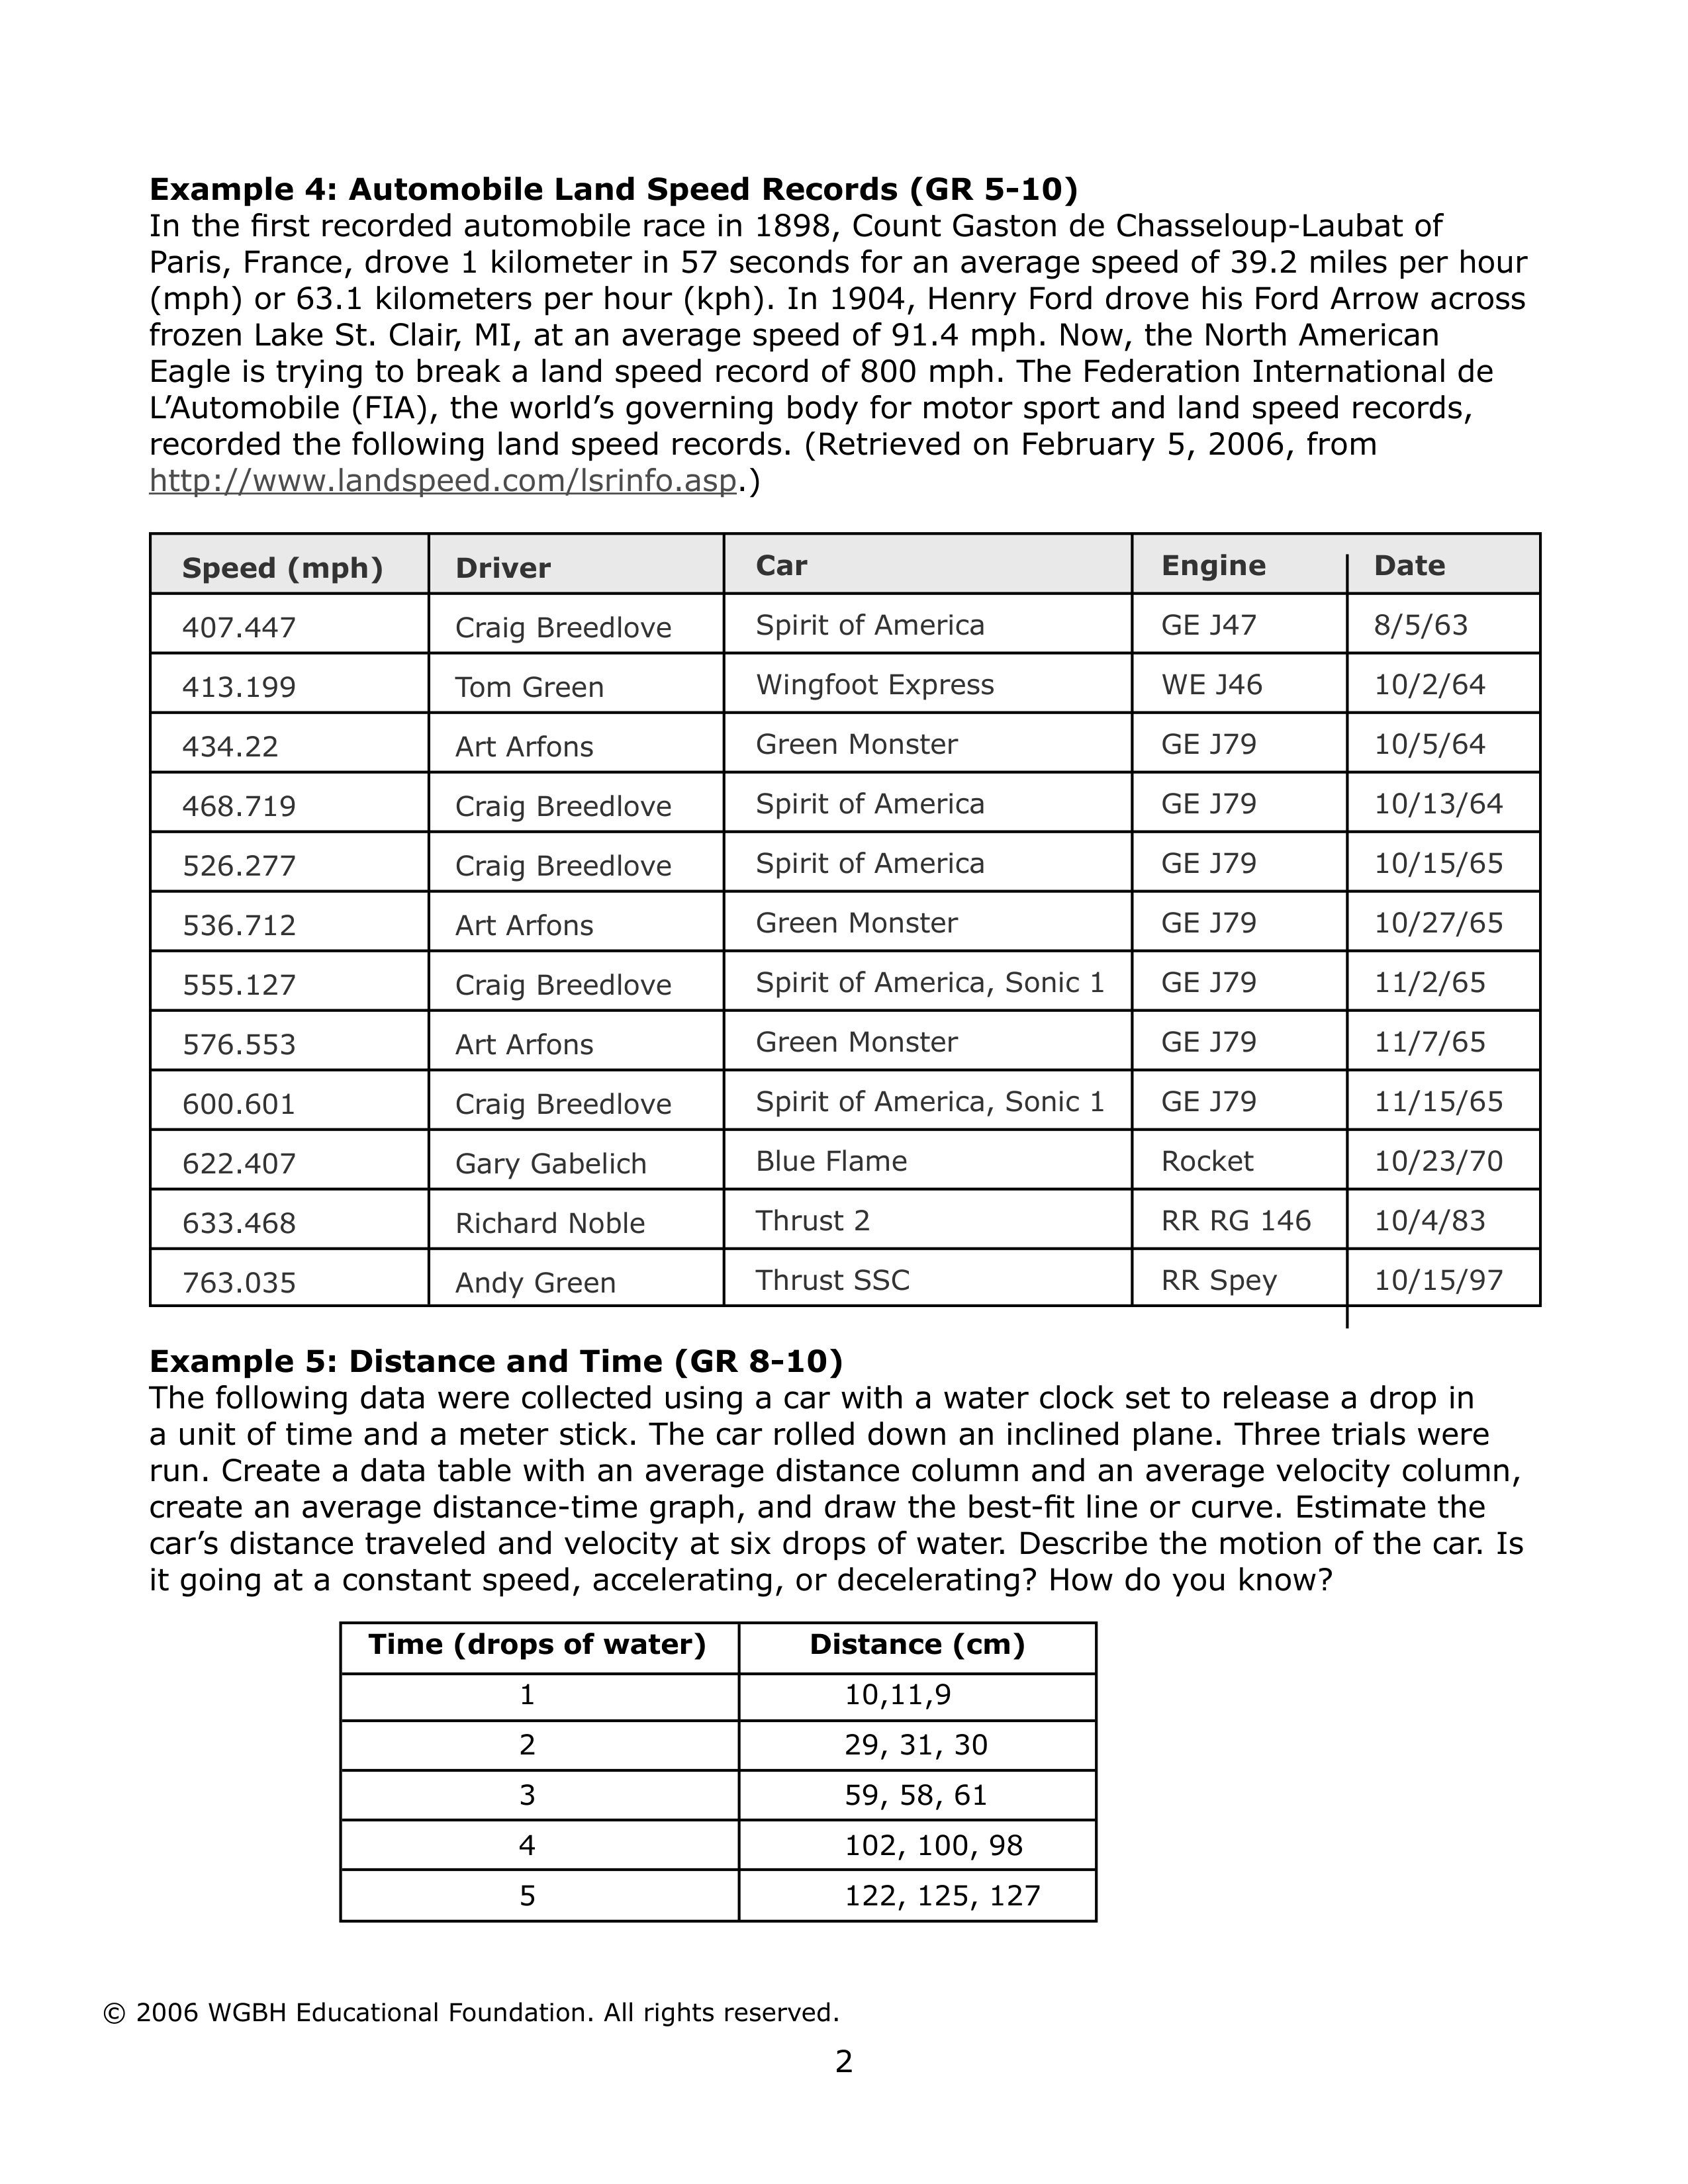

In [4]:
for img in pdf_from_path.images:
    display(PILImage.fromarray(img))

### Extract tables

In [5]:
# Extract tables
extracted_tables = pdf_from_path.extract_tables()

In [6]:
for page, tables in extracted_tables.items():
    for idx, table in enumerate(tables):
        display_html(table.html_repr(title=f"Page {page + 1} - Extracted table n°{idx + 1}"), raw=True)

,0,1
0,Number of Coils,Number of Paperclips
1,5,"3, 5, 4"
2,10,"7, 8, 6"
3,15,"11, 10, 12"
4,20,"15, 13, 14"


,0,1,2,3,4
0,Speed (mph),Driver,Car,Engine\nDate,Engine\nDate
1,407.447,Craig Breedlove,Spirit of America,GE J47,8/5/63
2,413.199,Tom Green,Wingfoot Express,WE J46,10/2/64
3,434.22,Art Arfons,Green Monster,GE J79,10/5/64
4,468.719,Craig Breedlove,Spirit of America,GE J79,10/13/64
5,526.277,Craig Breedlove,Spirit of America,GE J79,10/15/65
6,536.712,Art Arfons,Green Monster,GE J79,10/27/65
7,555.127,Craig Breedlove,"Spirit of America, Sonic 1",GE J79,11/2/65
8,576.553,Art Arfons,Green Monster,GE J79,11/7/65
9,600.601,Craig Breedlove,"Spirit of America, Sonic 1",GE J79,11/15/65


,0,1
0,Time (drops of water),Distance (cm)
1,1,"10,11,9"
2,2,"29, 31, 30"
3,3,"59, 58, 61"
4,4,"102, 100, 98"
5,5,"122, 125, 127"
